### 1. Load Data
<font color='hotpink'> a. Import Libraries <font/>

In [1]:
# Import Libraries for Dataframe and Visualization
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries for Machine Learning Algorithm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

<font color='hotpink'> b. Load Data <font/>

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### 2. Data Cleansing

        a. Check and Drop Missing Values
        b. Check and Drop Duplicates
        c. Check and Change Data Types
        d. Exclude Noisy Data

<font color='hotpink'> a. Check and Drop Missing Values <font/>

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df_null = round(df.isnull().sum() / len(df) * 100, 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

There are missing values in 'CustomerID' and 'Description' columns. <br>
Check if there are any rows have the same 'InvoiceNo' as the rows which have null 'CustomerID', so we can fill the rows with the same CustomerID.

In [8]:
invoice_no = df[df['CustomerID'].isnull()]['InvoiceNo']
len(df[df['InvoiceNo'].isin(invoice_no)]['InvoiceNo'])

135080

There's no same 'InvoiceNo', so drop missing values in 'CustomerID' column.

In [9]:
df = df.dropna(subset = 'CustomerID')
df.shape

(406829, 8)

<font color='hotpink'> b. Check and Drop Duplicates

In [10]:
df.duplicated().sum()

5225

In [11]:
df = df.drop_duplicates()
df.shape

(401604, 8)

<font color='hotpink'> c. Check and Change Data Types

The data type of 'CustomerID' should be object type.

In [12]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


<font color='hotpink'> d. Exclude Noisy Data

Remove negative and 0 values in 'Quantity' and 'UnitPrice' columns.

In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,401604.000000,401604,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-29 15:40:00,1.950000
75%,12.000000,2011-10-20 11:58:30,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,250.283037,NaN,69.764035


In [16]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,392692.000000,392692,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914
min,1.000000,2010-12-01 08:26:00,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 12:02:00,1.950000
75%,12.000000,2011-10-20 12:53:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,180.492832,NaN,22.241836


### 3. Explore Data & Cohort Analysis

In [17]:
# Create a column of total price
df['Total'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [18]:
# Top 10 customers by total price
df.groupby('CustomerID').agg({'Total':'sum'}).sort_values('Total', ascending = False).head(10)

,Total
CustomerID,
14646,280206.02
18102,259657.30
17450,194390.79
16446,168472.50
14911,143711.17
12415,124914.53
14156,117210.08
17511,91062.38
16029,80850.84


In [19]:
# Top 10 Countries
df['Country'].value_counts(normalize = True).head(10).mul(100).round(1)

Country
United Kingdom    88.9
Germany            2.3
France             2.1
EIRE               1.8
Spain              0.6
Netherlands        0.6
Belgium            0.5
Switzerland        0.5
Portugal           0.4
Australia          0.3
Name: proportion, dtype: float64

<font color='hotpink'> Corhort Analysis <font/>

Create a few labels for cohort analysis:

* Invoice Period: The year and month of each transaction.
* Cohort Group: The year and month of a particular customer’s first purchase.
* Cohort Index: A number represents the number of months passed since the first purchase.

In [20]:
# Create a column of the year and month of each transcation
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

# Create a column of the year and month of each customer's first transaction
group_c = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = group_c.transform('min')
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvoiceMonth,CohortMonth
230305,557132,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-06-17 08:57:00,0.55,13107,United Kingdom,13.20,2011-06-01,2011-01-01
485740,577633,22384,LUNCH BAG PINK POLKADOT,10,2011-11-21 10:35:00,1.65,14194,United Kingdom,16.50,2011-11-01,2011-02-01
439511,574476,22973,CHILDREN'S CIRCUS PARADE MUG,1,2011-11-04 12:20:00,1.65,17203,United Kingdom,1.65,2011-11-01,2011-10-01
540069,581457,23401,RUSTIC MIRROR WITH LACE HEART,126,2011-12-08 18:43:00,4.15,18102,United Kingdom,522.90,2011-12-01,2010-12-01
171118,551387,82486,WOOD S/3 CABINET ANT WHITE FINISH,2,2011-04-28 11:40:00,8.95,14240,United Kingdom,17.90,2011-04-01,2011-04-01


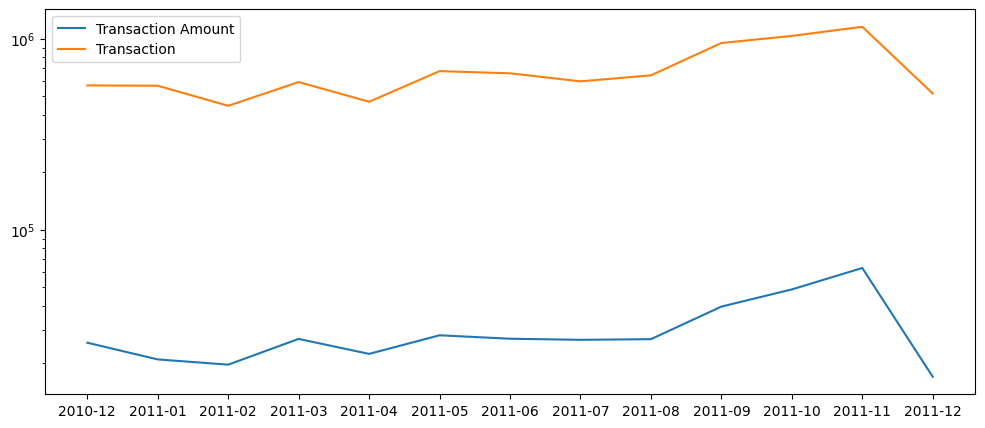

In [21]:
x = ['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
     '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']

y = df.groupby('InvoiceMonth').agg({'InvoiceNo':'count',
                                    'Total':'sum'})

plt.figure(figsize=(12, 5))
plt.plot(x, y)
plt.yscale('log')
plt.xticks(ticks = x)
plt.legend(['Transaction Amount', 'Transaction'])
plt.show()

In [22]:
def get_date(d, c):
    year = d[c].dt.year
    month = d[c].dt.month
    day = d[c].dt.day
    return year, month, day 

invoice_y, invoice_m, _ = get_date(df, 'InvoiceMonth')
cohort_y, cohort_m, _ = get_date(df, 'CohortMonth')

y_diff = invoice_y - cohort_y
m_diff = invoice_m - cohort_m

df['Cohort'] = y_diff * 12 + m_diff + 1
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvoiceMonth,CohortMonth,Cohort
4725,536798,48138,DOORMAT UNION FLAG,4,2010-12-02 15:55:00,7.95,17838,United Kingdom,31.8,2010-12-01,2010-12-01,1
108073,545477,82581,TOILET METAL SIGN,2,2011-03-03 11:07:00,0.55,14573,United Kingdom,1.1,2011-03-01,2010-12-01,4
96624,544572,21671,RED SPOT CERAMIC DRAWER KNOB,48,2011-02-21 13:21:00,1.25,14639,United Kingdom,60.0,2011-02-01,2010-12-01,3
369063,569010,21914,BLUE HARMONICA IN BOX,96,2011-09-30 07:36:00,1.25,14156,EIRE,120.0,2011-09-01,2010-12-01,10
190094,553182,21683,MEDIUM MEDINA STAMPED METAL BOWL,6,2011-05-15 12:21:00,2.95,17107,United Kingdom,17.7,2011-05-01,2011-03-01,3


In [23]:
# Count monthly customer number of each cohort
group = df.groupby(['CohortMonth', 'Cohort'])

cohort_data = group['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_c = cohort_data.pivot(index = 'CohortMonth', columns = 'Cohort', values = 'CustomerID')
cohort_c

Cohort,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Retention table
cohort_size = cohort_c.iloc[:, 0]

retention = cohort_c.divide(cohort_size, axis = 0)
retention.round(3) * 100

Cohort,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


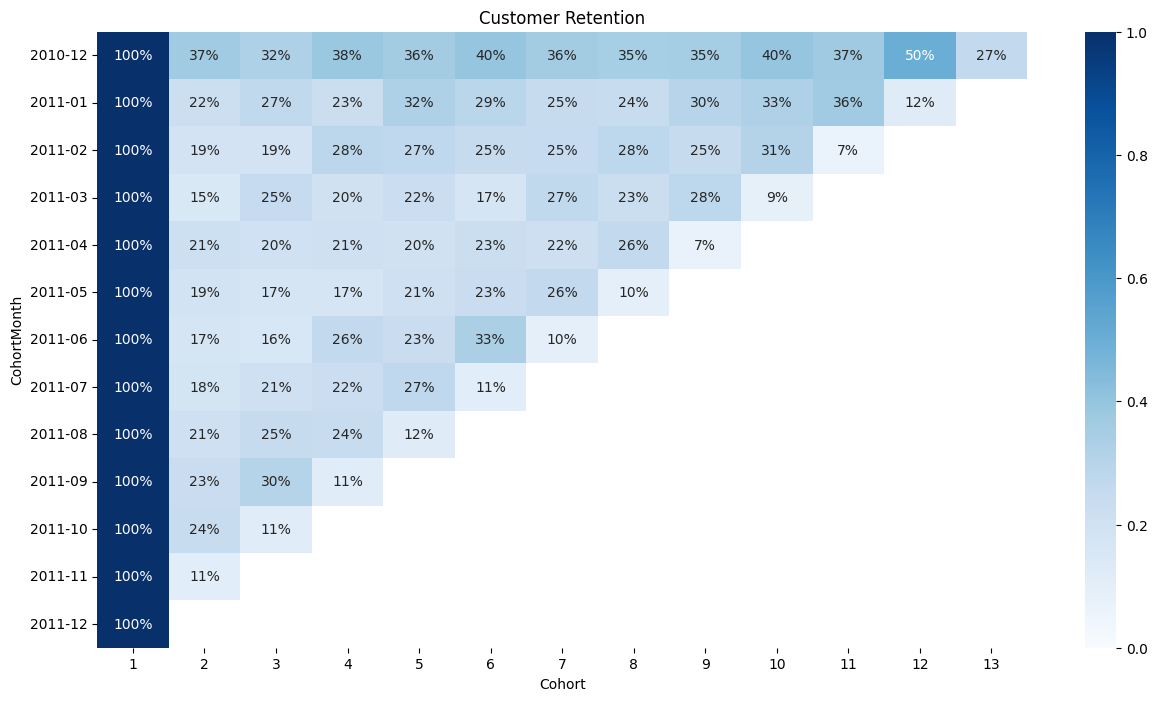

In [25]:
m_list = ['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
          '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']

plt.figure(figsize=(15, 8))
plt.title('Customer Retention')
sns.heatmap(retention, annot = True, fmt = '.0%', vmin = 0.0, vmax = 1, cmap="Blues", yticklabels = m_list)
plt.show()

### 4. RFM Analysis
    
      a. Calculate RFM Metrics
         RFM represents Recency, Frequency and Monetary.
         RFM is a model used to segment customers base by their purchasing patterns.
           
         Recency (R) : How long since the last purchase of each customer.
         Frequency (F) : How often each customer make purchases.
         Monetary (M) : Total amount of money each customer spends.
    
      b. Detect and Remove Outliers using the IQR Method
      
      c. RFM Score
         Rank each customer in these three categories on a scale of 1 to 4 (higher number, better result).

<font color='hotpink'> a. RFM (Recency, Frequency, Monetary)

In [26]:
# Find the day after last purchase date
cal_date = df['InvoiceDate'].max() + dt.timedelta(days = 1)
cal_date

Timestamp('2011-12-10 12:50:00')

In [27]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (cal_date - x.max()).days,
                                    'InvoiceNo':'count',
                                    'Total':'sum'})

rfm.rename(columns = {'InvoiceDate':'Recency',
                     'InvoiceNo':'Frequency',
                     'Total':'Monetary'}, inplace = True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


<font color='hotpink'> b. Detect and Remove Extreme Outliers using the IQR Method

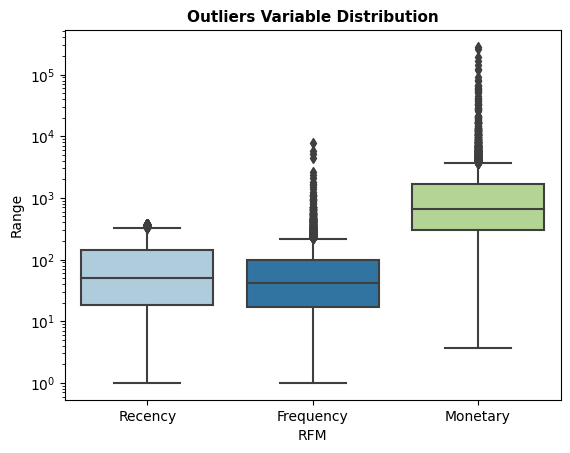

In [28]:
x = ['Recency', 'Frequency', 'Monetary']

sns.boxplot(data = rfm[x], palette = 'Paired')
plt.yscale('log')
plt.title('Outliers Variable Distribution', fontsize = 11, fontweight = 'bold')
plt.ylabel('Range')
plt.xlabel('RFM')
plt.show()

In [29]:
# Remove extreme outliers
def remove_out(dataframe, column, q1=0.25, q3=0.75):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    dataframe = dataframe[(dataframe[column] >= Q1 - 3 * IQR) & (dataframe[column] <= Q3 + 3 * IQR)]
    return dataframe

In [30]:
rfm = remove_out(rfm, 'Recency', q1=0.25, q3=0.75)
rfm = remove_out(rfm, 'Frequency', q1=0.25, q3=0.75)
rfm = remove_out(rfm, 'Monetary', q1=0.25, q3=0.75)
rfm.shape

(3986, 3)

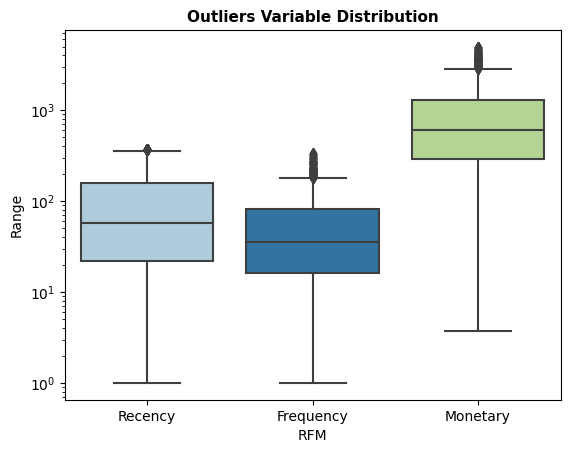

In [31]:
x = ['Recency', 'Frequency', 'Monetary']

sns.boxplot(data = rfm[x], palette = 'Paired')
plt.yscale('log')
plt.title('Outliers Variable Distribution', fontsize = 11, fontweight = 'bold')
plt.ylabel('Range')
plt.xlabel('RFM')
plt.show()

In [32]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_quartiles = pd.qcut(rfm['Recency'], q = 4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q = 4, labels = f_labels)
m_quartiles = pd.qcut(rfm['Monetary'], q = 4, labels = m_labels)

rfm = rfm.assign(R = r_quartiles,
                 F = f_quartiles,
                 M = m_quartiles)

rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347,2,182,4310.00,4,4,4
12348,75,31,1797.24,2,2,4
12349,19,73,1757.55,4,3,4
12350,310,17,334.40,1,2,2
12352,36,85,2506.04,3,4,4


In [34]:
def rfm_seg(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM'] = rfm.apply(rfm_seg, axis = 1)

rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM
CustomerID,,,,,,,
12347,2,182,4310.00,4,4,4,444
12348,75,31,1797.24,2,2,4,224
12349,19,73,1757.55,4,3,4,434
12350,310,17,334.40,1,2,2,122
12352,36,85,2506.04,3,4,4,344


<font color='hotpink'> c. RFM Score

In [35]:
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
CustomerID,,,,,,,,
12347,2,182,4310.00,4,4,4,444,12
12348,75,31,1797.24,2,2,4,224,8
12349,19,73,1757.55,4,3,4,434,11
12350,310,17,334.40,1,2,2,122,5
12352,36,85,2506.04,3,4,4,344,11


In [36]:
rfm.reset_index(inplace = True)
rfm.tail()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score
3981,18278,74,9,173.90,2,1,1,211,4
3982,18280,278,10,180.60,1,1,1,111,3
3983,18281,181,7,80.82,1,1,1,111,3
3984,18282,8,12,178.05,4,1,1,411,6
3985,18287,43,70,1837.28,3,3,4,334,10


In [37]:
rfm.describe()

,Recency,Frequency,Monetary,RFM_Score
count,3986.000000,3986.000000,3986.000000,3986.000000
mean,98.766433,58.822378,966.485069,7.506021
std,101.248189,61.840784,986.791835,2.753820
min,1.000000,1.000000,3.750000,3.000000
25%,22.000000,16.000000,288.240000,5.000000
50%,58.000000,35.500000,598.650000,8.000000
75%,157.000000,81.000000,1303.410000,10.000000
max,374.000000,340.000000,4951.410000,12.000000


### 5. K-Means Cluster
        a. Data Preprocessing: Data Scaling & Standardization 
        b. Find the Optimal Number of Clusters Using Elbow Method and Silhouette Coefficient
        c. K-Means Clustering

<font color='hotpink'> a. Data Preprocessing: Data Scaling & Standardization 

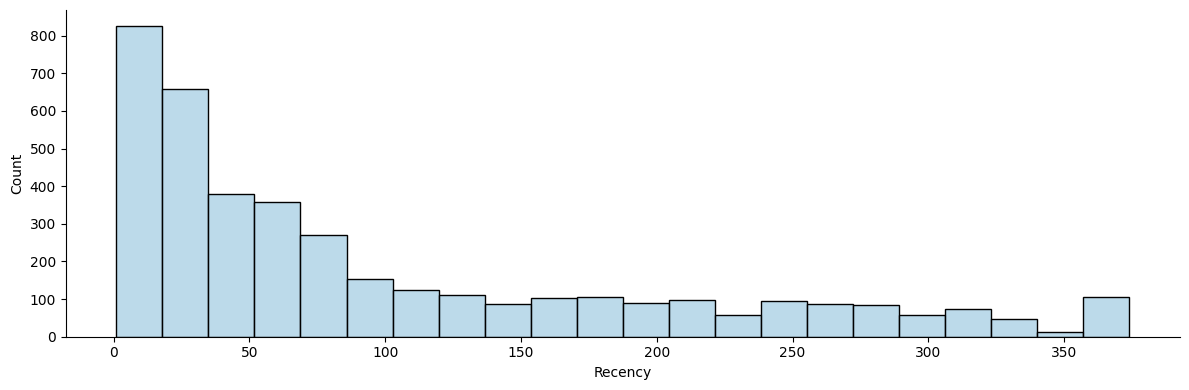

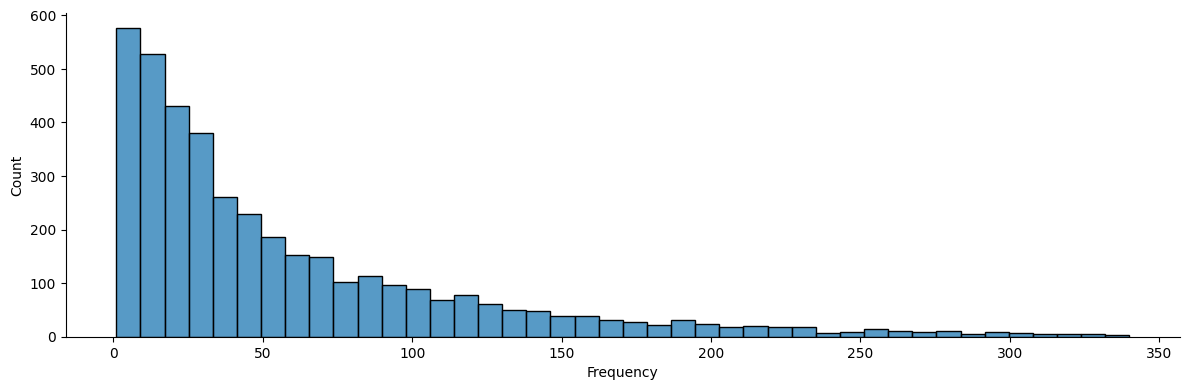

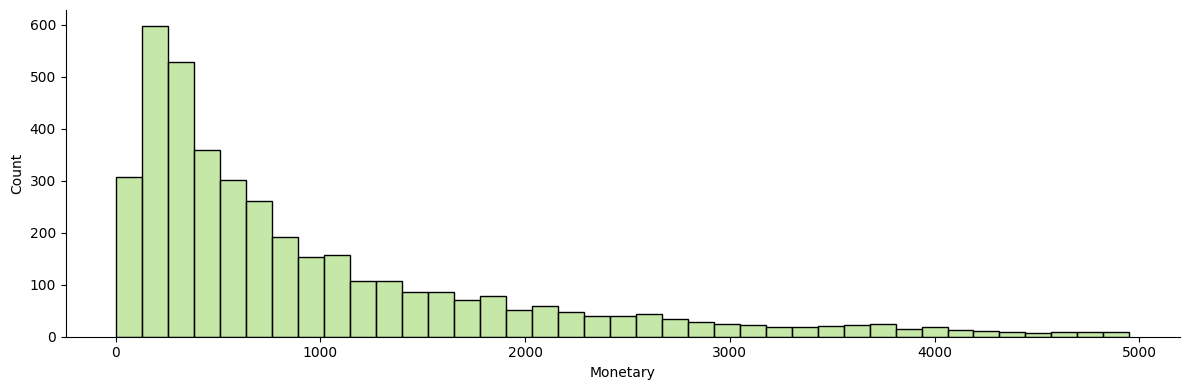

In [38]:
# Distribution of Recency, Frequency and Monetary
sns.displot(x = 'Recency', data = rfm, color = '#a6cee3', height=4, aspect=3)
sns.displot(x = 'Frequency', data = rfm, color = '#1f78b4', height=4, aspect=3)
sns.displot(x = 'Monetary', data = rfm, color = '#b2df8a', height=4, aspect=3)

plt.tight_layout()
plt.show()

In [39]:
# Undkew data with log scale
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [40]:
# Standardization
scaler = StandardScaler()
rfm_standard = scaler.fit_transform(rfm_log)
rfm_standard = pd.DataFrame(rfm_standard)
rfm_standard.columns = ['Recency', 'Frequency', 'Monetary']
rfm_standard.head()

,Recency,Frequency,Monetary
0,-2.361293,1.429428,1.893926
1,0.303274,-0.052642,1.063188
2,-0.706232,0.664111,1.042301
3,1.347337,-0.555876,-0.533727
4,-0.235668,0.792222,1.378394


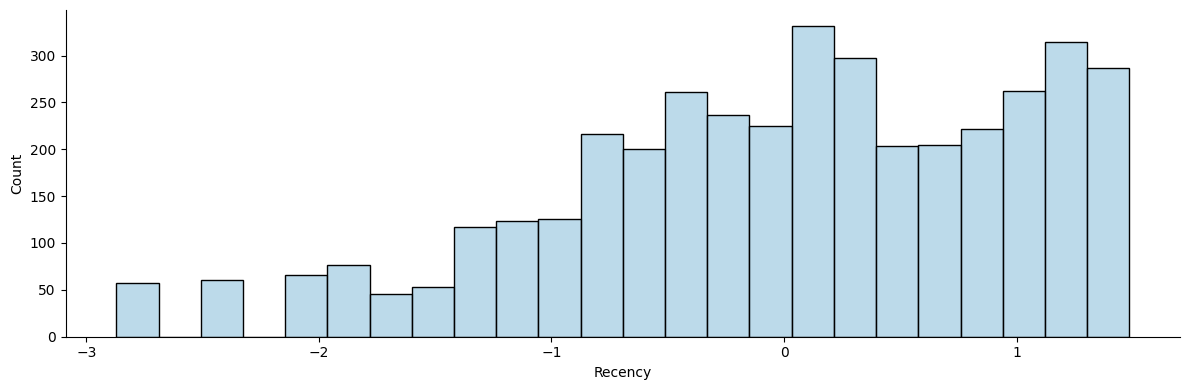

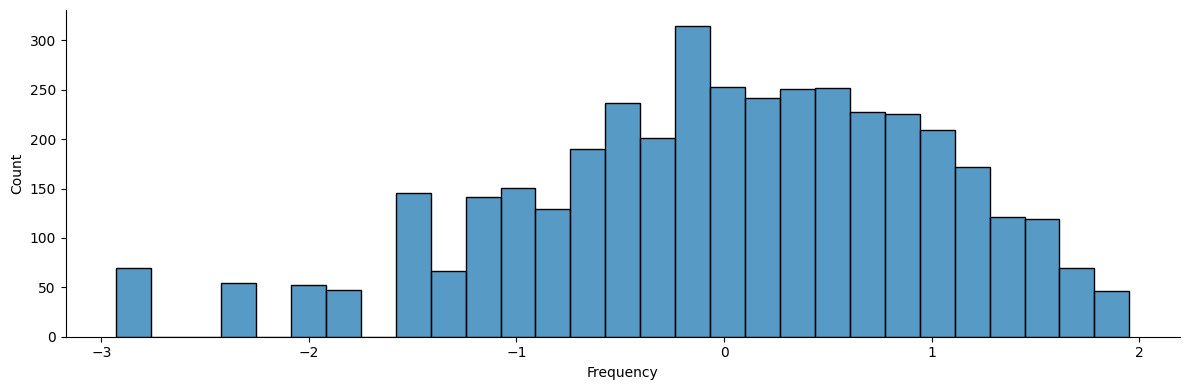

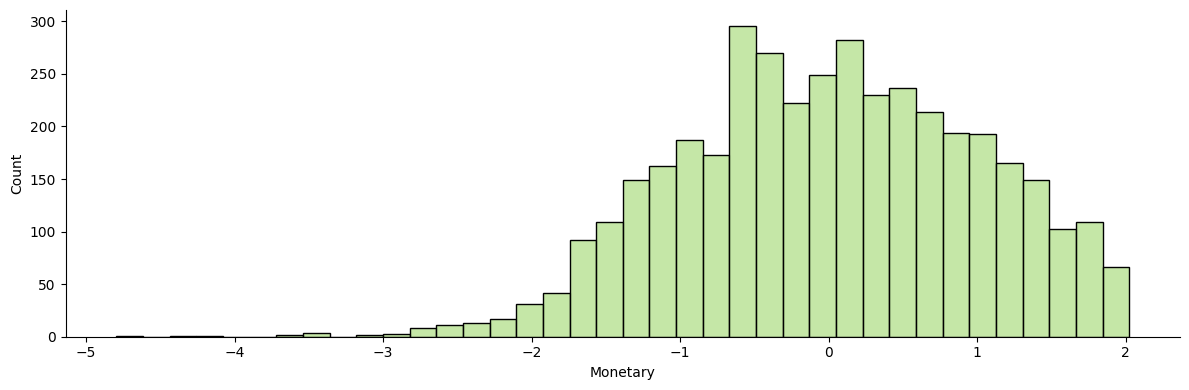

In [41]:
# Distribution of Recency, Frequency and Monetary
sns.displot(x = 'Recency', data = rfm_standard, color = '#a6cee3', height=4, aspect=3)
sns.displot(x = 'Frequency', data = rfm_standard, color = '#1f78b4', height=4, aspect=3)
sns.displot(x = 'Monetary', data = rfm_standard, color = '#b2df8a', height=4, aspect=3)

plt.tight_layout()
plt.show()

<font color='hotpink'> b. Find the Optimal Number of Clusters Using Elbow Method and Silhouette Coefficient

In [42]:
wcss = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state = 1)
    kmeans.fit(rfm_standard)
    wcss.append(kmeans.inertia_)

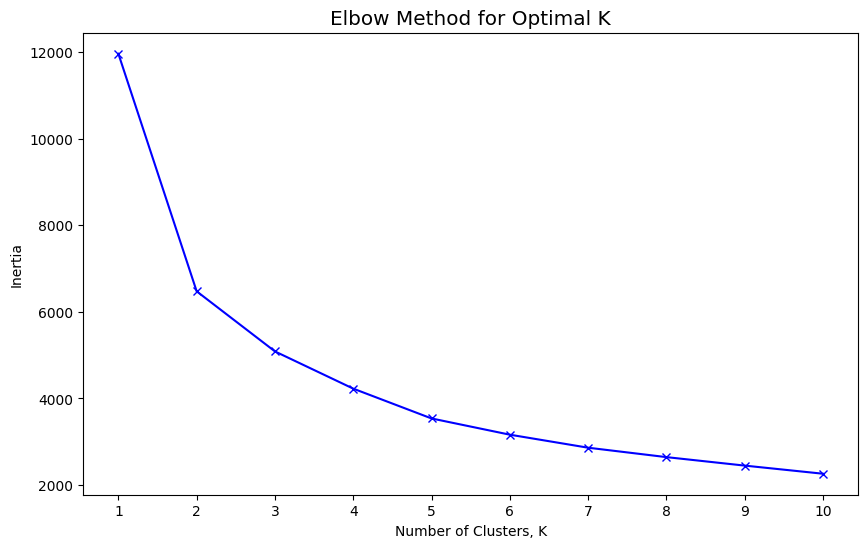

In [43]:
f, ax = plt.subplots(figsize=(10,6))
plt.style.use('ggplot')

plt.plot(range_k, wcss, marker = 'x', color = 'blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters, K')
plt.ylabel('Inertia')
plt.xticks(range_k)
plt.show()

In [44]:
from sklearn.metrics import silhouette_score
range_k = range(2, 11)
silhouette_avg = []

for k in range_k:
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state = 1)
    kmeans.fit(rfm_standard)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(rfm_standard, cluster_labels))

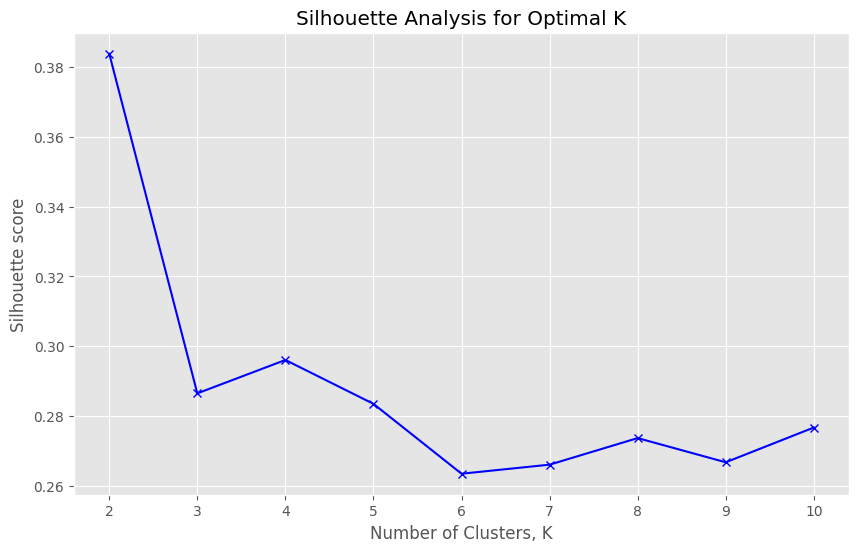

In [45]:
f, ax = plt.subplots(figsize=(10,6))
plt.style.use('ggplot')

plt.plot(range_k, silhouette_avg, marker = 'x', color = 'blue')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters, K')
plt.ylabel('Silhouette score')
plt.xticks(range_k)
plt.show()

<font color='hotpink'> c. K-Means Clustering

In [46]:
# Choose K=4
kmeans = KMeans(n_clusters=4, random_state=46)
kmeans.fit(rfm_standard)

cluster_labels = kmeans.labels_
cluster_labels

array([3, 1, 3, ..., 2, 0, 3])

In [47]:
rfm_k4= rfm.assign(K_Cluster = cluster_labels)
rfm_k4.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,K_Cluster
0,12347,2,182,4310.00,4,4,4,444,12,3
1,12348,75,31,1797.24,2,2,4,224,8,1
2,12349,19,73,1757.55,4,3,4,434,11,3
3,12350,310,17,334.40,1,2,2,122,5,2
4,12352,36,85,2506.04,3,4,4,344,11,3


In [48]:
rfm_k4.groupby('K_Cluster').agg({'Recency':'mean',
                                 'Frequency':'mean',
                                 'Monetary':'mean',
                                 'RFM_Score':'mean'}).round(1)

,Recency,Frequency,Monetary,RFM_Score
K_Cluster,,,,
0,24.7,30.7,441.2,7.5
1,139.5,50.4,882.9,7.2
2,191.4,10.7,228.2,4.0
3,23.5,129.8,2070.7,10.9


In [49]:
rfm_k4['K_Cluster'].value_counts(normalize = True)

K_Cluster
1    0.290768
3    0.275715
2    0.246111
0    0.187406
Name: proportion, dtype: float64

In [50]:
rfm.describe()

,Recency,Frequency,Monetary,RFM_Score
count,3986.000000,3986.000000,3986.000000,3986.000000
mean,98.766433,58.822378,966.485069,7.506021
std,101.248189,61.840784,986.791835,2.753820
min,1.000000,1.000000,3.750000,3.000000
25%,22.000000,16.000000,288.240000,5.000000
50%,58.000000,35.500000,598.650000,8.000000
75%,157.000000,81.000000,1303.410000,10.000000
max,374.000000,340.000000,4951.410000,12.000000


In [51]:
rfm_standard['CustomerID'] = rfm['CustomerID']
rfm_standard = rfm_standard.assign(K_Cluster = cluster_labels)
rfm_standard.head()

,Recency,Frequency,Monetary,CustomerID,K_Cluster
0,-2.361293,1.429428,1.893926,12347,3
1,0.303274,-0.052642,1.063188,12348,1
2,-0.706232,0.664111,1.042301,12349,3
3,1.347337,-0.555876,-0.533727,12350,2
4,-0.235668,0.792222,1.378394,12352,3


In [52]:
rfm_melt = pd.melt(rfm_standard,
                   id_vars = ['CustomerID', 'K_Cluster'],
                   value_vars = ['Recency', 'Frequency', 'Monetary'],
                   var_name = 'Metric',
                   value_name = 'Value')
rfm_melt.head()

,CustomerID,K_Cluster,Metric,Value
0,12347,3,Recency,-2.361293
1,12348,1,Recency,0.303274
2,12349,3,Recency,-0.706232
3,12350,2,Recency,1.347337
4,12352,3,Recency,-0.235668


In [53]:
rfm_melt.shape

(11958, 4)

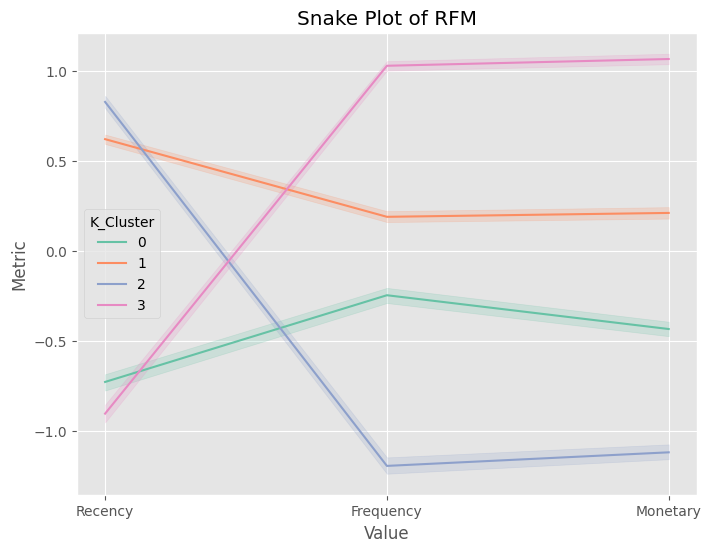

In [54]:
f, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x='Metric', y='Value', hue='K_Cluster', data=rfm_melt, palette="Set2")
plt.style.use('ggplot')
plt.title('Snake Plot of RFM')
plt.xlabel('Value')
plt.ylabel('Metric')
plt.show()

In [55]:
from mpl_toolkits.mplot3d import Axes3D

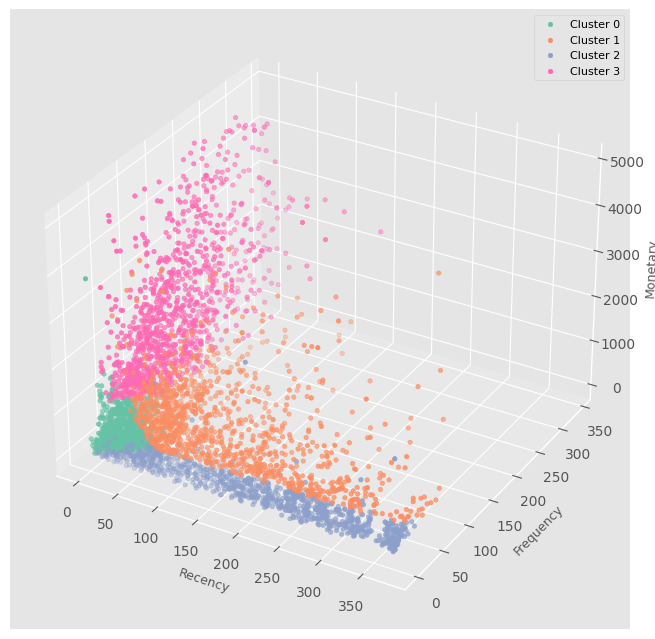

In [56]:
colors=['#66c2a5', '#fc8d62', '#8da0cb', 'hotpink']
fig = plt.figure()
fig.set_size_inches(8, 10)
ax = plt.axes(projection='3d') #fig.add_subplot(111, projection='3d')

for i in range(kmeans.n_clusters):
    rfm_standard=rfm_k4[rfm_k4['K_Cluster'] == i]
    ax.scatter(rfm_standard['Recency'], 
               rfm_standard['Frequency'],
               rfm_standard['Monetary'],
               s=10,
               label='Cluster '+str(i),
               c=colors[i])
    
ax.set_xlabel('Recency', fontsize=9)
ax.set_ylabel('Frequency', fontsize=9)
ax.set_zlabel('Monetary', fontsize=9)

plt.legend(fontsize=8)
plt.show()

In [58]:
rfm_k4.to_excel("RFM_K4.xlsx", sheet_name='rfm_k4')

In [59]:
df.to_excel('df_clean.xlsx', sheet_name='df')